# Simulace aproximací pravděpodobnostních rozdělení
Tento notebook obsahuje simulace základních aproximací pravděpoodobnostních rozdělení pro kurz Základy teorie pravděpodobnosti a matematické statistiky.

## Hypergeometrické rozdělení
Hypergeometrické rozdělení nám reprezentuje pravděpodobnost *p(x)*, že při výběru *n* prvků z množiny o velikosti *N* s *A* prvky dané vlastnosti, vybereme právě daných *n* prvků bude mít danou vlastnost.

### Aproximace hypergeometrického rozdělení
Dané rozdělení můžeme aproximovat pomocí Binomického rozdělení pro hodnoty *n/N < 0.1*. V daném případě konverguje hypergeometrické rozdělení k binomickému v distribuci.

## Definice hypergeometrického rozdělení
Pro přípustné hodnoty vypočteme hypergeometrické rozdělení pomocí vzorce:
$$P(X = x) = \frac{\binom{A}{x} \binom{N - A}{n - x}}{\binom{N}{n}}$$

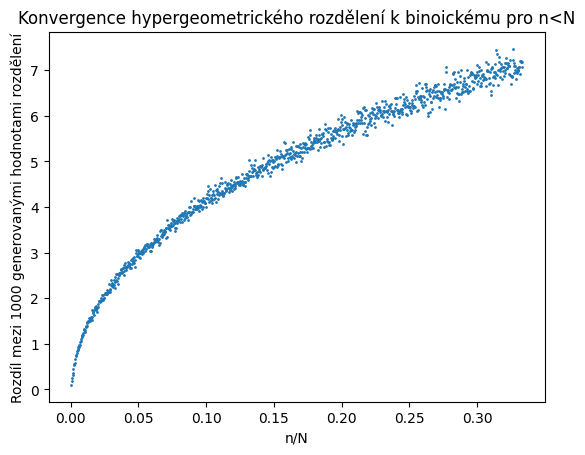

Pearsonův korelační koeficient: PearsonRResult(statistic=0.9676110570516296, pvalue=0.0)
Spearmanův korelační koeficient: SignificanceResult(statistic=0.9945310620052671, pvalue=0.0)
Kendall-tau korelační koeficient: SignificanceResult(statistic=0.9425164041009717, pvalue=0.0)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr

iterations = 1000

#Vybírané prvky
n = iterations
#Velikost množiny
N = iterations * 3
#Počet prvků s danou vlastností
A = 150

#Values for the x axis representing difference between binomial and hypergeometric distribution
x_values = []

#Y values do represent the n/N ratio. Our simulation goal is to show, that smaller this value is, closer they are
y_values = []

for i in range(iterations):
  #Pravdepodobnost pro binomické rozdělení
  p = A/N
  y_values.append(n/N)
  # Vygenerujeme 1000 hodnot hypergeometrického rozdělení
  binomial = np.random.binomial(n, p, size=iterations)

  # Nyní vygenerujeme 1000 hodnot binomického rozdělení
  rv = hypergeom.rvs(N, A, n, size = iterations)

  # Nyní určíme jejich průměrnou odchylku
  diff = abs(np.sum(abs(binomial - rv)) / iterations)
  x_values.append(diff)

  n = n - 1

plt.title("Konvergence hypergeometrického rozdělení k binoickému pro n<N")
plt.xlabel("n/N")
plt.ylabel("Rozdíl mezi 1000 generovanými hodnotami rozdělení")
plt.scatter(y_values,x_values, s=1)
plt.show()

#Zkusíme testy korelace mezi nižším n/N a nižším rozdílem hodnot
print("Pearsonův korelační koeficient: " + str(pearsonr(y_values, x_values)))
print("Spearmanův korelační koeficient: " + str(spearmanr(y_values, x_values)))
print("Kendall-tau korelační koeficient: " + str(kendalltau(y_values, x_values)))




# Binomické rozdělení
Binomické rozdělení vyjadřuje četnost výskytu *x* v *n* nezávislých pokusech.
Hodnotu pravděpodobnostní funkce *P(x)* vypočteme jako:

$$P(X = x) = \binom{n}{x} p^x (1-p)^{n-x}$$

## Aproximace Binomického rozdělení Poissonovým

Binomické rozdělení můžeme aproximovat Poissonovým pro *n >= 100* a *np <= 10*, poté Binomické rozdělení konverguje k Poissonovu v distribuci pro *λ=np*. Daný vztah se pokusíme nasimulovat a reprezentovat grafem.

## Poissonovo rozdělení

Pro výpočet hodnot Poissonova rozdělení využijeme vzorec

$$P(X = x) = \frac {e^{-\lambda} \lambda^x}{x!}$$

Získáme z něj pravděpodobnostní funkci popisující počet výskytů nezávislých jevů v časovém intervalu.

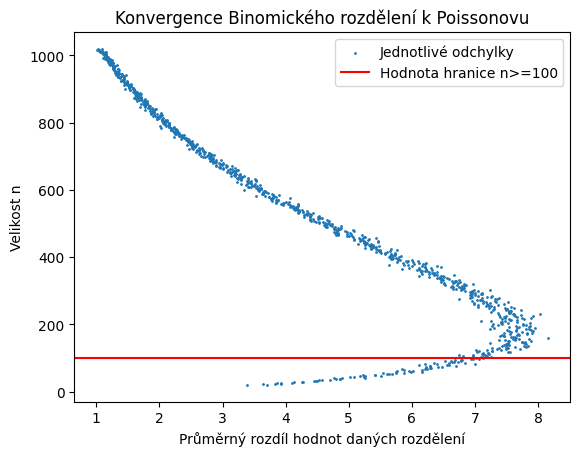

In [48]:
plt.clf()

# Rozdíly daných rozdělení jako abs(sum(bin-poisson))
x_values = []
y_values = []
n_to_p_ratio = []

# Pravděpodobnost, že dojde k jevu x
p = 0.9
# Počet pokusů
n = 20

# Počet iterací simulace
iterations = 1000

for i in range(iterations):

  # Generujeme iter. hodnot binomického rozdělení
  binomial = np.random.binomial(n, p, size=iterations)

  # Generujeme iter. hodnot poissonova rozdělení
  poisson = np.random.poisson(n*p, size=iterations)

  # Určíme jejich průměrnou odchylku
  x_values.append(np.sum(abs(poisson-binomial))/iterations)

  y_values.append(n)

  n += 1
  # Hodnota pro průběžné klesání poměru n*p
  p *= 0.993221

plt.title("Konvergence Binomického rozdělení k Poissonovu")
plt.xlabel("Průměrný rozdíl hodnot daných rozdělení")
plt.ylabel("Velikost n")
plt.scatter(x_values, y_values, s=1, label="Jednotlivé odchylky")
plt.axhline(y = 100, color = 'r', linestyle = '-', label="Hodnota hranice n>=100")
plt.legend()
plt.show()

